# Análise Exploratória de Dados - Doenças Cardiovasculares

Doenças cardiovasculares são uma classe contendo diferentes tipos de doenças que afetam de alguma maneira o coração ou os vasos sanguíneos. Dentro da classe, existem várias doenças comoangina de peito, cardiopatia, arritmia cardíaca e aneurisma da aorta.

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/396260-PCIO15-306.jpg"></center>

Apesar de ser uma das principais causas de morte em todo o mundo, estima-se que cerca de 90% das doenças cardiovasculares poderiam ser evitadas por meio da adoção de algumas medidas e mudanças no *lifestyle*.

Existem hoje várias pesquisas na área de *Machine Learning* visando a construções de modelos preditivos que ajudem os médicos a descobrirem doenças cardiovasculares em seus pacientes.

Estudos publicados na revista *na revista Nature Biomedical Engineering* mostram que algoritmos de *Deep Learning* foram capazes de antecipar doenças cardíacas em até 5 anos.

Definitivamente, o uso de Inteligência Artificial tem impactado profundamente a área da saúde, e tem proporcionado aos profissionais médicos insumos de inteligência cada vez mais precisos.



## Obtenção dos Dados

O conjunto principal de dados usado neste projeto foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Ressalta-se que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.

O *dataset* processado contém dados de 303 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de *Data Science* usará essas mesmas 14 variáveis principais.

<p><img alt="Colaboratory logo" height="100" src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/Large45.jpg" align="right" hspace="20px" vspace="0px"></p>

* O arquivo `csv` com os dados de 303 pessoas e 14 atributos pode ser baixado [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

* O arquivo contendo todos os detalhes e documentação do *dataset* usado neste projeto se encontra [neste link](https://github.com/carlosfab/curso_data_science_na_pratica/blob/master/modulo_03/heart-disease.names).

* Há ainda um *dataset* secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).



### Informações sobre os atributos:


* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - *thallium stress test*
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

### Importar os Dados

Em uma etapa inicial, importaremos os dois *datasets* mencionados no início do *notebook*:

* Um contendo os dados relacionados às doenças cardiovasculares (303 pessoas e 14 atributos); e
* Um contendo os dados da mortalidade no Brasil por doenças cardiovasculares.

In [63]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# url dos datasets
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"
dataset_brasil = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv"

# importar dataset da UCI
df = pd.read_csv(dataset_uci)

# importar dataset dos indíces do Brasil
df_brasil = pd.read_csv(dataset_brasil)

Olhando acima as informações sobre os atributos, percebemos que nossa variável alvo (`num`) possui cinco valores possíveis: \[0, 1, 2, 3, 4\].

No entanto, seguindo a maioria das pesquisas que utilizaram esse *dataset*, iremos considerar apenas duas situações possíveis:

* **0** - não há doença cardíaca
* **1** - há doença cardíaca

Então, iremos igualar a 1 os valores compreendidos entre 1-4.

In [2]:
# variável alvo antes
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [4]:
# converter valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

In [5]:
# variável alvo depois
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

### Ánalise dos dados
Para uma análise inicial, irei ver o tamanho da base de dados, a quantidade de linhas e colunas.
Percebe-se que o dataframe possui 3030 linhas(Pessoas) e 14 colunas(Atributos)

In [6]:
df.shape

(303, 14)

Agora, para possuir maior noção sobre os tipos de dados que estou trabalhando irei utilizar um comando para ver o resumo estátistico do dataframe.

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


Com o resumo estátistico é possível ter variadas perpepcões sobre o conjunto de dados, como a média dos valores por coluna, o desvio padrão(linha std), o mínimo de cada coluna, assim como o máximo e os 4 quartis.

Irei analisar os tipos de variáveis que pertencem ao banco de dados.

In [12]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

Percebe-se que o conjunto de dados possui 13 entradas do tipo float(Ponto flutuante, numero com decimal) e a coluna *num* é do tipo inteiro.


Para ter uma noção melhor do dataframe, é necessário vizualizar o mesmo, para isso utilizarei o comando head, para ver as 5 primeiras linhas do dataframe

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Após isso, realizarei um levantamento de quantos pacientes possuem doenças cardiovasculares e quantos não possuem.

In [15]:
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

Como resultado, obtive que o conjunto de dados possui 164 zeros(0) e 139 uns(1), e isso signifca que 164 pessoas não possuem nenhuma doença cardiovascular e 139 possuem.

Neste momento, farei a checagem de valores nulos no dataframe

In [19]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Com isso, possuo o conhecimento de que não há nenhum valor ausente no dataframe.

Agora irei ver quantos homens e quantas mulheres estão presentes no dataframe, através de um gráfico de barras.

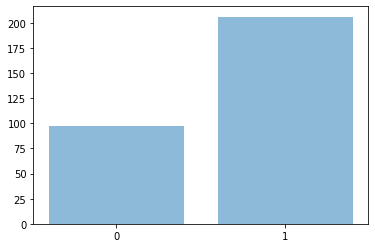

In [46]:
#converter o sex em int
df.sex = df.sex.astype(int)

#gráfico

x = df.sex.value_counts().index
y = df.sex.value_counts().values

fig, ax = plt.subplots()
ax.bar(x, y, align='center', alpha=0.5)
ax.set_xticks(x)
plt.show()

Observando este gráfico percebe-se possui mais homens do que mulheres no dataframe, o dobro.

Agora irei plotar o gráfico de dispersão das variáveis *age* e *chol*

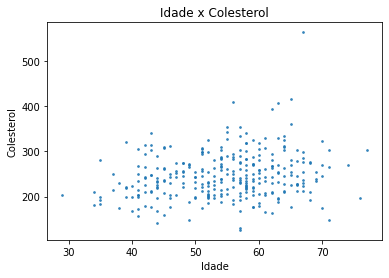

In [52]:
fig, ax = plt.subplots()
ax.scatter(df.age, df.chol, s=3, alpha=0.8)
ax.set_title("Idade x Colesterol")
ax.set_xlabel("Idade")
ax.set_ylabel("Colesterol")
plt.show()

Histograma do colesterol sérico

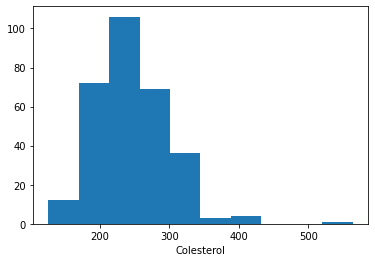

In [57]:
fig, ax = plt.subplots()
ax.hist(df.chol)
ax.set_xlabel("Colesterol")
plt.show()

Analisando esse histograma é possível perceber que a maior parte dos valores do colesterol estão entre 200-300

Gráfico de pizza para *restecg* - Eletrocardiografia de repouso

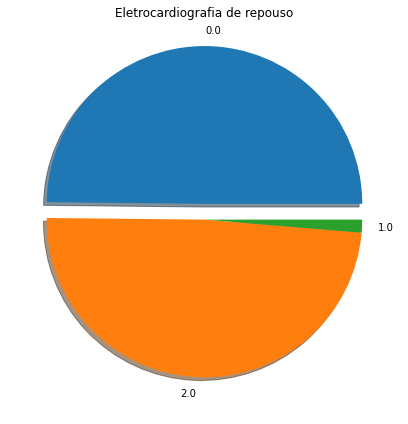

In [61]:
restecg_classificacao = dict(df.restecg.value_counts())

labels = restecg_classificacao.keys()
sizes = restecg_classificacao.values()
explode = (0.1, 0, 0)

#plotar grafico

fig, ax = plt.subplots(figsize=(6,6))

ax.pie(sizes, labels=labels, explode = explode, shadow=True)
ax.set_title("Eletrocardiografia de repouso")
plt.tight_layout()

Heatmap com as correlações

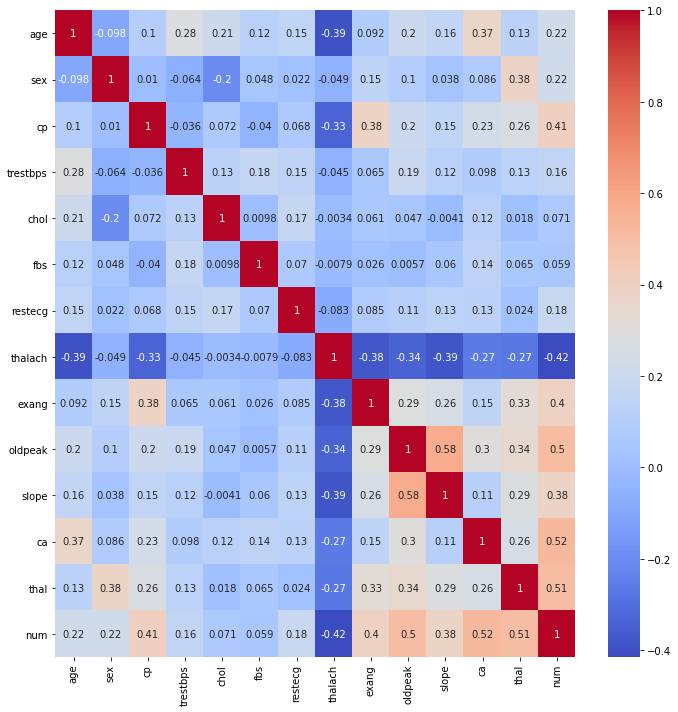

In [65]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, ax=ax, cmap="coolwarm");
plt.tight_layout()

Para analisar o heatmap(mapa de calor), é necessário saber que quanto mais próximo do vermelho, mais correlativo os valores são, neste acima da para perceber que a variável *slope*(inclinação do segmento ST no pico do exercício) está com correlação positiva com a variável *oldpeak*(depessão do segmento ST induzida pelo exercício em relação ao repouso)

# Análise no dataframe Brasil.
Neste momento, irei realizar uma análise através de um gráfico no segundo dataframe, o df_brasil

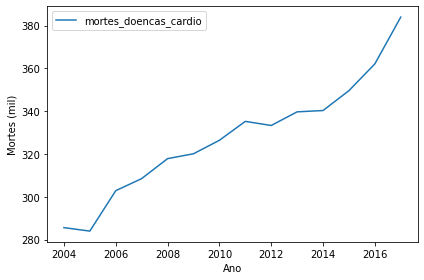

In [32]:
fig, ax = plt.subplots()
df_brasil.plot("ano", "mortes_doencas_cardio", ax=ax)
ax.set_xlabel("Ano")
ax.set_ylabel("Mortes (mil)")
plt.tight_layout()

Após a vizualização desses dados em forma de gráfico, é póssivel confirmar a hipótese de que as mortes por doenças cardiovasculares estão aumentando a cada ano. Comparando o ano de 2004 com o ano de 2016, percebe-se que ouve um aumento de quase 100 mil mortos anuais.